<img width=100% src="https://capsule-render.vercel.app/api?type=rect&height=50&color=gradient&section=header&reversal=false">

## state of data

Uma novidade dessa edição da pesquisa foram perguntas com a intenção de medir o uso de tecnologias de AI Generativa e LLM's pelas empresas e seus profissionais. A amostra reflete a visão de variados papéis de atuação em empresas, como os de *analista de dados*, *cientista de dados* e *engenheiro de dados*, bem como diferentes perfis de experiência profissional, incluindo analistas júnior, pleno, sênior e gestores.

In [43]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import altair as alt

In [30]:
data = pd.read_csv('dados/State_of_data.csv')

In [31]:
data.shape

(5293, 399)

In [32]:
data.head()

,"('P0', 'id')","('P1_a ', 'Idade')","('P1_a_1 ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_c ', 'Cor/raca/etnia')","('P1_d ', 'PCD')","('P1_e ', 'experiencia_profissional_prejudicada')","('P1_e_1 ', 'Não acredito que minha experiência profissional seja afetada')","('P1_e_2 ', 'Experiencia prejudicada devido a minha Cor Raça Etnia')","('P1_e_3 ', 'Experiencia prejudicada devido a minha identidade de gênero')",...,"('P8_d_3 ', 'Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.')","('P8_d_4 ', 'Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).')","('P8_d_5 ', 'Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.')","('P8_d_6 ', 'Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.')","('P8_d_7 ', 'Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.')","('P8_d_8 ', 'Utilizando ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises.')","('P8_d_9 ', 'Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.')","('P8_d_10 ', 'Criando e gerenciando soluções de Feature Store e cultura de MLOps.')","('P8_d_11 ', 'Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')","('P8_d_12 ', 'Treinando e aplicando LLM's para solucionar problemas de negócio.')"
0,001b2d1qtli8t9z7oqgdhj001b2d4i0g,31,30-34,Masculino,Branca,Não,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0026aa3fwd78u0026asg7456tfkjg2cs,30,30-34,Masculino,Branca,Não,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00r21rb9pusd1b0v7ew00r21rw3dy69w,37,35-39,Feminino,Amarela,Não,"Sim, acredito que a minha a experiência profis...",0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00urm3jf2cek12w6ygue00urm3jzd17j,22,22-24,Masculino,Preta,Não,Não acredito que minha experiência profissiona...,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00v0az4g792svil00vn6y1kfm9hq8vy9,34,30-34,Masculino,Branca,Não,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
import re
# removendo nomes com p0,p1,...
def limpar_coluna(col):
    match = re.search(r"'[^']*'\s*,\s*'([^']*)'", col)
    return match.group(1).strip() if match else col.strip()

data.columns = [limpar_coluna(col) for col in data.columns]


## analise exploratoria

In [16]:
data['Idade'].isnull().sum()

np.int64(0)

### aplicando tecnica PCA

In [23]:
# verificando as colunas numericas e nao numericas
numeric_cols = data.select_dtypes(include=[np.number]).columns
non_numeric_cols = data.select_dtypes(exclude=[np.number]).columns

print("\nNúmero de colunas numéricas:", len(numeric_cols))
print("Número de colunas não numéricas:", len(non_numeric_cols))


Número de colunas numéricas: 330
Número de colunas não numéricas: 69


In [24]:
# verificando colunas repitidas ou nao
print("\nNúmero de colunas únicas:", len(set(data.columns)))
print("Número de colunas com nomes duplicados:", len(data.columns) - len(set(data.columns)))


Número de colunas únicas: 354
Número de colunas com nomes duplicados: 45


In [36]:
def pode_ser_numerica(coluna):
    try:
        pd.to_numeric(coluna)
        return True
    except:
        return False

# Função para analisar uma coluna
def analisar_coluna(df, coluna):
    print(f"\nAnálise da coluna: {coluna}")
    print("-" * 50)
    
    # Informações básicas
    print(f"Tipo de dados: {df[coluna].dtype}")
    print(f"Valores únicos: {df[coluna].nunique()}")
    print(f"Valores nulos: {df[coluna].isnull().sum()}")
    
    # Verificando se pode ser numérica
    if df[coluna].dtype == 'object':
        print("\nTentando converter para numérico...")
        try:
            valores_numericos = pd.to_numeric(df[coluna])
            print("✓ Coluna pode ser convertida para numérica")
            print(f"Valores únicos após conversão: {valores_numericos.nunique()}")
            print(f"Valores nulos após conversão: {valores_numericos.isnull().sum()}")
        except:
            print("✗ Coluna não pode ser convertida para numérica")
            print("\nAmostra de valores únicos:")
            print(df[coluna].unique()[:5])
    else:
        print("\nColuna já é numérica")
        print("Estatísticas básicas:")
        print(df[coluna].describe())

In [39]:
numeric_columns = data.select_dtypes(include=[np.number]).columns
data_numeric = data[numeric_columns]


In [40]:
# Removendo colunas com muitos valores nulos
data_numeric = data_numeric.dropna(axis=1, thresh=0.7*len(data_numeric))

In [44]:
# Imputando valores nulos restantes com a média
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data_numeric)

In [45]:
# Padronizando os dados
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

In [46]:
# Aplicando PCA
pca = PCA()
pca_result = pca.fit_transform(data_scaled)

In [47]:
# Criando DataFrame com os resultados do PCA
pca_df = pd.DataFrame(
    data=pca_result,
    columns=[f'PC{i+1}' for i in range(pca_result.shape[1])]
)

In [48]:
# Calculando a variância explicada
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

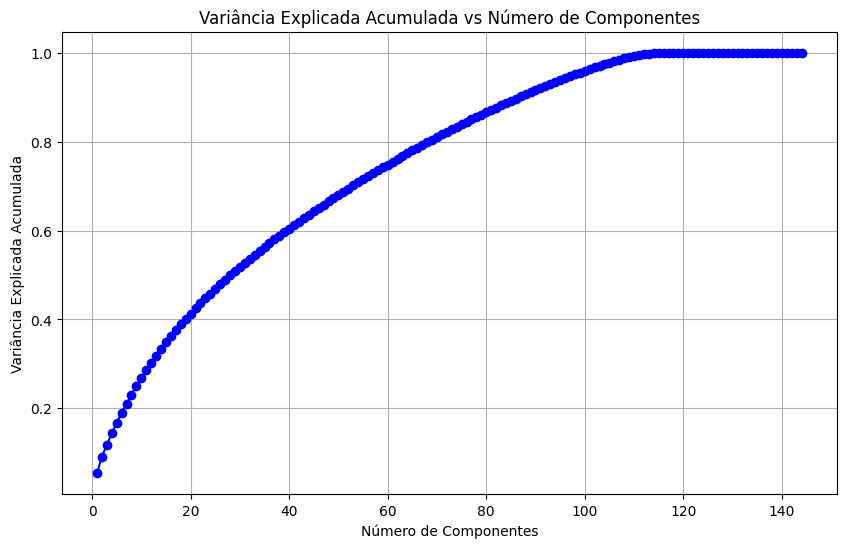

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, 'bo-')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Variância Explicada Acumulada vs Número de Componentes')
plt.grid(True)
plt.savefig('variancia_explicada.png')
plt.show()
plt.close()

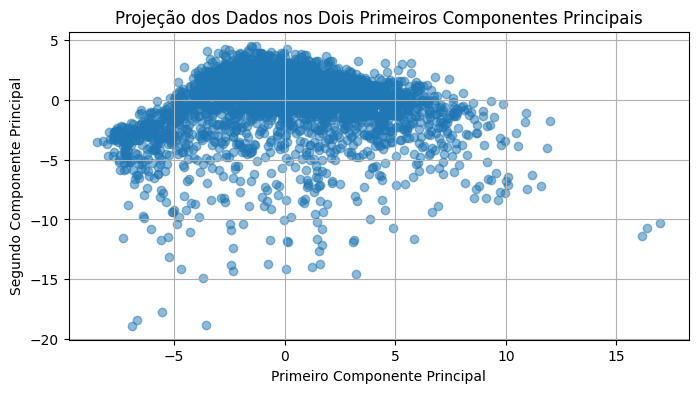

In [52]:
plt.figure(figsize=(8, 4))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.xlabel('Primeiro Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.title('Projeção dos Dados nos Dois Primeiros Componentes Principais')
plt.grid(True)
plt.savefig('pca_projecao.png')
plt.show()
plt.close()

In [53]:
feature_importance = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca_result.shape[1])],
    index=data_numeric.columns
)

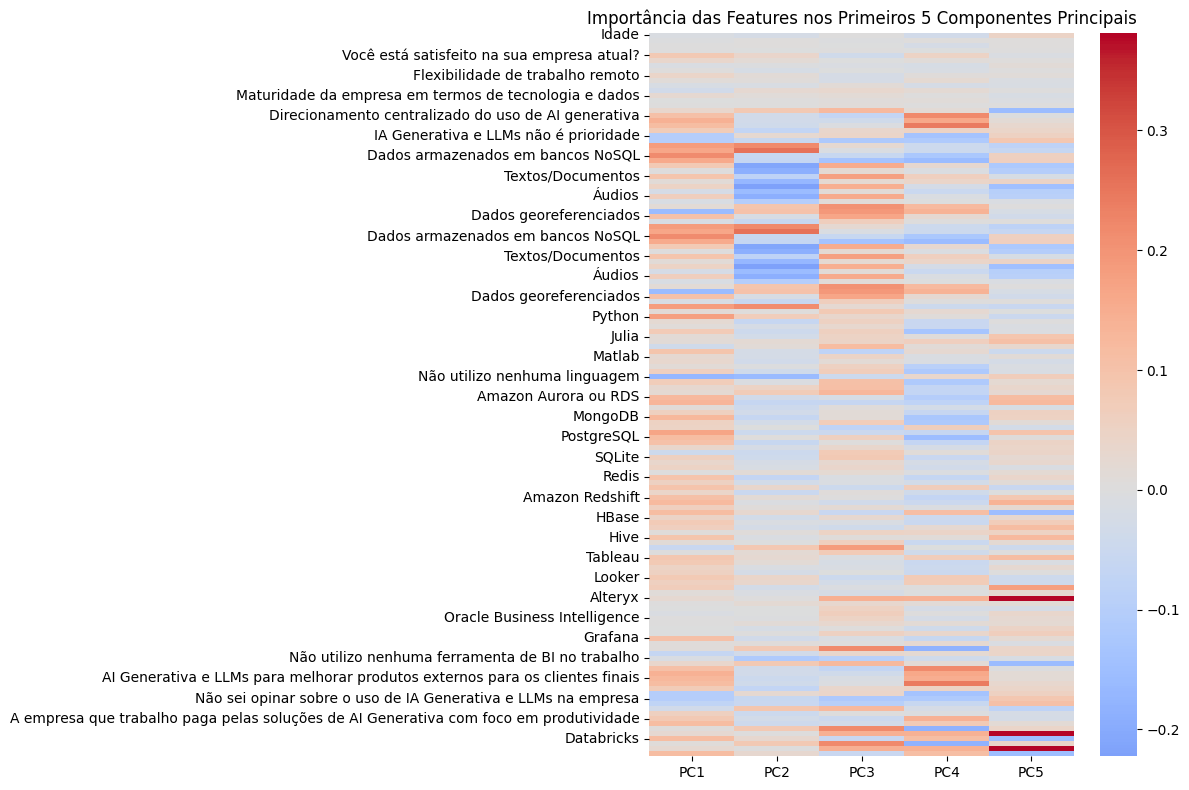

In [55]:
plt.figure(figsize=(12, 8))
sns.heatmap(feature_importance.iloc[:, :5], cmap='coolwarm', center=0)
plt.title('Importância das Features nos Primeiros 5 Componentes Principais')
plt.tight_layout()
plt.show()
plt.savefig('feature_importance.png')
plt.close()

In [56]:
# Imprimindo informações sobre a redução de dimensionalidade
print(f"\nNúmero final de features: {data_numeric.shape[1]}")
print(f"Variância explicada pelos primeiros 5 componentes: {sum(explained_variance[:5]):.2%}")
print("\nTop 5 features mais importantes para cada componente principal:")
for i in range(5):
    print(f"\nPC{i+1}:")
    top_features = feature_importance[f'PC{i+1}'].abs().nlargest(5)
    for feature, importance in top_features.items():
        print(f"{feature}: {importance:.4f}") 
        


Número final de features: 144
Variância explicada pelos primeiros 5 componentes: 16.71%

Top 5 features mais importantes para cada componente principal:

PC1:
Dados armazenados em bancos NoSQL: 0.2156
Dados armazenados em bancos NoSQL: 0.2156
Dados relacionais (estruturados em bancos SQL): 0.1874
Dados relacionais (estruturados em bancos SQL): 0.1874
SQL: 0.1821

PC2:
Dados relacionais (estruturados em bancos SQL): 0.2566
Dados relacionais (estruturados em bancos SQL): 0.2566
Vídeos: 0.2224
Vídeos: 0.2224
Dados relacionais (estruturados em bancos SQL): 0.2176

PC3:
Pentaho: 0.2168
Pentaho: 0.2168
Pentaho: 0.2168
Planilhas: 0.2036
Planilhas: 0.2036

PC4:
AI Generativa e LLMs para melhorar produtos internos para os colaboradores: 0.2425
AI Generativa e LLMs para melhorar produtos internos para os colaboradores: 0.2425
Direcionamento centralizado do uso de AI generativa: 0.2173
Direcionamento centralizado do uso de AI generativa: 0.2173
Pentaho: 0.1840

PC5:
Alteryx: 0.3815
Alteryx: 0.38